In [1]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.feature
import scipy.signal
import math
import keras

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 740M (CNMeM is enabled with initial size: 70.0% of memory, cuDNN 5005)


In [2]:
images = []
files= []
images_dotted = []
files_dotted = []
for filename in glob.glob('TrainSmall2\\Train\\*.jpg'):
    print(filename)
    im = Image.open(filename)
    images.append(im)
    files.append(filename)
for filename in glob.glob('TrainSmall2\\TrainDotted\\*.jpg'):
    print(filename)
    im = Image.open(filename)
    images_dotted.append(im)
    files_dotted.append(filename)
labels = pd.read_csv('TrainSmall2\\Train\\train.csv',index_col=0)

TrainSmall2\Train\41.jpg
TrainSmall2\Train\42.jpg
TrainSmall2\Train\43.jpg
TrainSmall2\Train\44.jpg
TrainSmall2\Train\45.jpg
TrainSmall2\Train\46.jpg
TrainSmall2\Train\47.jpg
TrainSmall2\Train\48.jpg
TrainSmall2\Train\49.jpg
TrainSmall2\Train\50.jpg
TrainSmall2\TrainDotted\41.jpg
TrainSmall2\TrainDotted\42.jpg
TrainSmall2\TrainDotted\43.jpg
TrainSmall2\TrainDotted\44.jpg
TrainSmall2\TrainDotted\45.jpg
TrainSmall2\TrainDotted\46.jpg
TrainSmall2\TrainDotted\47.jpg
TrainSmall2\TrainDotted\48.jpg
TrainSmall2\TrainDotted\49.jpg
TrainSmall2\TrainDotted\50.jpg


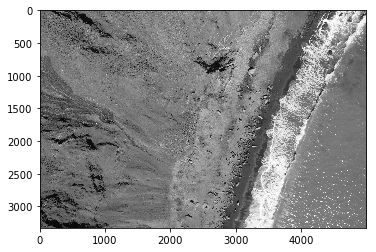

In [20]:
plt.imshow(np.array(images[0])[:,:,1],cmap='gray')
plt.show()

In [4]:
imgs_gray = [np.array(image.convert('LA'))[:,:,0] for image in images]

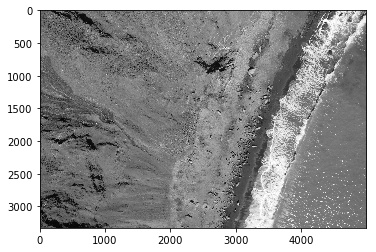

In [5]:
plt.imshow(imgs_gray[0],cmap='gray')
plt.show()

In [7]:
blobs = skimage.feature.blob_log(imgs_gray[0], min_sigma=3, max_sigma=4, num_sigma=1, threshold=0.02)

KeyboardInterrupt: 

In [22]:
def G(x,y,sigma):
    return 1 / (2 * math.pi * sigma**2) * math.e ** (-(x**2 + y**2)/(2 * sigma**2))

stepSize = 1

def gauss_filter(sigma, x0=0.0, y0=0.0):
    """ 
        Computes a Gaussian kernel with a given sigma. 
        For simplicity, assume sigma_x = sigma_y = sigma.
    """
    kernelSize = int(round(3 * sigma))
    
    x = np.array([a for a in np.arange(-kernelSize+x0, kernelSize+x0 + 1, stepSize)])
    y = np.array([b for b in np.arange(-kernelSize+y0, kernelSize+y0 + 1, stepSize)])
    g = np.array([[G(a, b, sigma) for b in y] for a in x])
        
    return g

In [6]:
# From https://www.kaggle.com/threeplusone/sea-lion-coordinates
class_colors = (
    (243,8,5),          # red
    (244,8,242),        # magenta
    (87,46,10),         # brown 
    (25,56,176),        # blue
    (38,174,21),        # green
)
class_names = (
    'adult_males',
    'subadult_males',
    'adult_females',
    'juveniles',
    'pups',
    'NOT_A_SEA_LION'
)

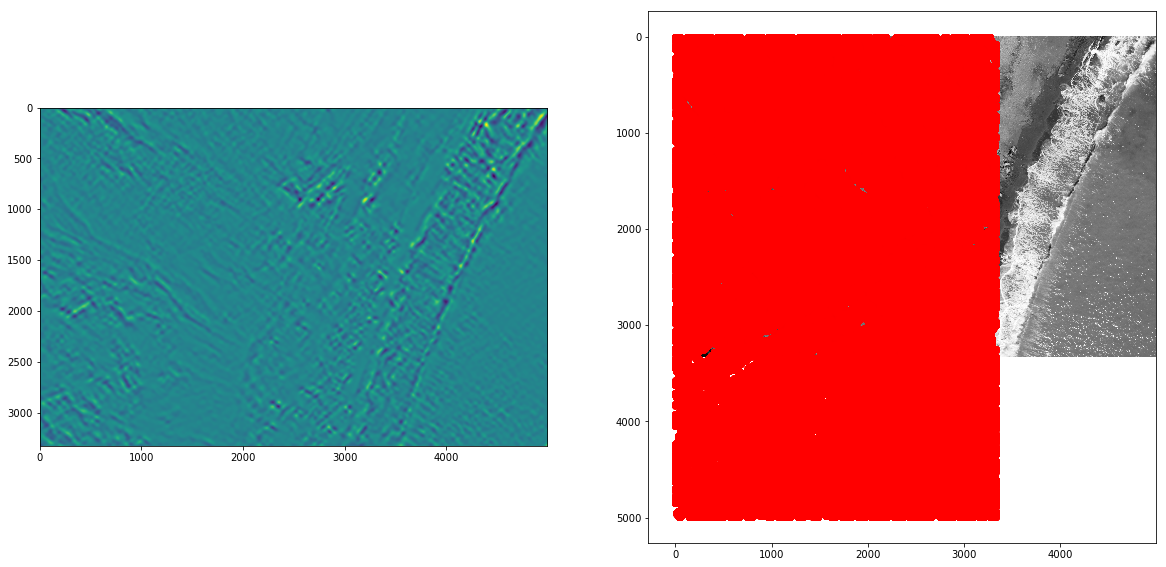

In [44]:
test_img = imgs_gray[0]
for s in [20]:
    g_f = gauss_filter(s)
    g = scipy.signal.fftconvolve(test_img, g_f, mode='same')
    gx_f = np.gradient(g_f, stepSize,axis=0)
    gy_f = np.gradient(g_f, stepSize,axis=1)
    gx = scipy.signal.fftconvolve(test_img, gx_f, mode='same')
    gy = scipy.signal.fftconvolve(test_img, gy_f, mode='same')
    # Apply 2nd derivative of gaussian filter
    gxx_f = np.gradient(gx_f, stepSize, axis=0)
    gyy_f = np.gradient(gy_f, stepSize, axis=1)
    gxy_f = np.gradient(gx_f, stepSize, axis=1)
    
    gxx = scipy.signal.fftconvolve(test_img, gxx_f, mode='same')
    gyy = scipy.signal.fftconvolve(test_img, gyy_f, mode='same')
    gxy = scipy.signal.fftconvolve(test_img, gxy_f, mode='same')
    
    thresholded = np.zeros(test_img.shape,dtype=np.float32)
    idxs = np.where(gxy>0)
    
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(gxy)
    plt.subplot(122)
    plt.imshow(test_img,cmap='gray')
    plt.scatter(idxs[0],idxs[1],c='r')
    plt.show()